# Gai/Lib: Examples

## Text-to-Text (TTT)

text generation example

In [1]:
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")

# Mistral7B
print("> Mistral-7B")
for chunk in ggg(category="ttt",messages="user: Tell me a one paragraph story\nassistant:"):
    print(chunk.decode(),end="",flush=True)
print("\n")

2024-02-20 18:01:04 DEBUG gai.lib.ttt.TTTClient:base_url=https://gaiaio.ai/api/gen
2024-02-20 18:01:04 DEBUG gai.common.http_utils:httppost:url=https://gaiaio.ai/api/gen/v1/chat/completions
2024-02-20 18:01:04 DEBUG gai.common.http_utils:httppost:data={'beam_length': 1,
 'beams': 1,
 'max_new_tokens': 1000,
 'messages': [{'content': 'Tell me a one paragraph story', 'role': 'user'},
              {'content': '', 'role': 'assistant'}],
 'min_p': 0.0,
 'model': 'mistral7b-exllama',
 'stream': True,
 'temperature': 1.2,
 'token_repetition_penalty_decay': 128,
 'token_repetition_penalty_max': 1.25,
 'token_repetition_penalty_sustain': 256,
 'top_k': 50,
 'top_p': 0.15,
 'typical': 0.0}


> Mistral-7B
 Once upon a time, in a small village nestled at the foot of a mountain, there lived an old woman who had spent her entire life tending to her garden. She was known throughout the land for her beautiful flowers and lush vegetables, which she would sell at the local market every week. One day, as she was out picking her produce, she stumbled across a mysterious seed that she had never seen before. Without hesitation, she planted it in her garden and watched as it grew into the most magnificent tree she had ever seen. The tree bore fruit unlike any other, with juicy oranges that were filled with gold coins. The villagers were amazed by this newfound treasure and flocked to the old woman's house to get their share. From then on, the old woman became rich beyond her wildest dreams, all thanks to the magical seed she found in her garden.({'finish_reason': 'stop'}, 'finish_reason')



In [2]:
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")

# GPT4
print("> OpenAI")
for chunk in ggg(category="ttt",generator="gpt-4",messages="user: Tell me a one paragraph story\nassistant:"):
    print(chunk.decode(),end="",flush=True)
print("\n")

2024-02-20 18:01:11 DEBUG gai.lib.ttt.TTTClient:base_url=https://gaiaio.ai/api/gen


> OpenAI
Once up a time, in the quiet coastal town of Noddingham, lived a wily old fisherman named Jim. Surrounded by tales of a mythical sea creature, Jim spent day and night tirelessly out at sea, with the dream of catching this legendary beast. One mystical midsummer's night, under a shimmering moonlit sky, he felt an unusual tug on his net. As he hauled it up with all his strength, he was bewitched by the sight of an illuminating creature with scales that danced with hues of the moon. Recognizing its mystical aura, he decided to set it free, causing the town myth to be true and Jim became the minstrel of Noddingham, living not just as a fisherman, but as a protector of the sea's magic.
None



In [3]:
print("> OpenAI API")

import os
import openai
from openai import OpenAI
from dotenv import load_dotenv
load_dotenv()
if not os.environ.get("OPENAI_API_KEY"):
    raise Exception(
        "OPENAI_API_KEY not found in environment variables")
openai.api_key = os.environ["OPENAI_API_KEY"]
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role":"user","content":"Tell me a one paragraph story"}],
    stream=True,
    max_tokens=100,
)
for chunk in response:
    if chunk.choices[0].delta.content:
        print(chunk.choices[0].delta.content,end="",flush=True)

> OpenAI API
In the quaint town of Lovelock, hidden beneath layers of urban lore and provincial magic, lived a humble baker named Samuel. Notorious for his tantalizing cinnamon rolls, his shop, lovingly named 'Samuel's Sweets’ was frequented by everyone in town. One late evening, he discovered a forgotten recipe from his late grandmother – a recipe for enchanted cookies which was said to touch the soul and bring immeasurable happiness. To honor his grandmother's memory, he decided to bake

### TTT With Function Call

OpenAPI provides a powerful feature for its API known as Function Calling. Essentially, this is a mechanism for the LLM to seek external assistance when it encounters limitations in its text generation capabilities. It does this by returning a string that emulates the calling of a function, based on the function description provided by the user.

In the following example, we demonstrate function calling  being to an open source model using Mistral7b.

In [4]:
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")

# Mistral7B
print("> Mistral-7B")
response = ggg(category="ttt",
    messages="user: What is today's date?\nassistant:",
    tools=[
        {
            "type": "function",
            "function": {
                "name": "gg",
                "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "search_query": {
                            "type": "string",
                            "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                        }
                    },
                    "required": ["search_query"]
                }
            }
        }                   
    ],
    stream=False)
print(response.decode())

2024-02-20 18:01:27 DEBUG gai.lib.ttt.TTTClient:base_url=https://gaiaio.ai/api/gen
2024-02-20 18:01:27 DEBUG gai.common.http_utils:httppost:url=https://gaiaio.ai/api/gen/v1/chat/completions
2024-02-20 18:01:27 DEBUG gai.common.http_utils:httppost:data={'beam_length': 1,
 'beams': 1,
 'max_new_tokens': 1000,
 'messages': [{'content': "What is today's date?", 'role': 'user'},
              {'content': '', 'role': 'assistant'}],
 'min_p': 0.0,
 'model': 'mistral7b-exllama',
 'stream': False,
 'temperature': 1.2,
 'token_repetition_penalty_decay': 128,
 'token_repetition_penalty_max': 1.25,
 'token_repetition_penalty_sustain': 256,
 'tools': [{'function': {'description': "The 'gg' function is a powerful tool "
                                        'that allows the AI to gather external '
                                        'information from the internet using '
                                        'Google search. It can be invoked when '
                                        'th

> Mistral-7B
{'type': 'function', 'name': 'gg', 'arguments': ' { "search_query": "current date" }'}


In [5]:
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")

# OpenAI
print("> OpenAI")
response = ggg(category="ttt",
                generator="gpt-4",
               messages="user: Who is the current president of Singapore?\nassistant:",
                tools=[
                    {
                        "type": "function",
                        "function": {
                            "name": "gg",
                            "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                            "parameters": {
                                "type": "object",
                                "properties": {
                                    "search_query": {
                                        "type": "string",
                                        "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                                    }
                                },
                                "required": ["search_query"]
                            }
                        }
                    }                   
                ],
               stream=False)
print(response.decode())

2024-02-20 18:01:32 DEBUG gai.lib.ttt.TTTClient:base_url=https://gaiaio.ai/api/gen


> OpenAI
{'type': 'function', 'name': 'gg', 'arguments': '{\n  "search_query": "current president of Singapore"\n}'}


In [6]:
print("> OpenAI Original")
import os,json
import openai
from openai import OpenAI
from dotenv import load_dotenv
load_dotenv()
if not os.environ.get("OPENAI_API_KEY"):
    raise Exception(
        "OPENAI_API_KEY not found in environment variables")
openai.api_key = os.environ["OPENAI_API_KEY"]
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role":"user","content":"Tell me the latest news on Singapore"}],
    stream=True,
    max_tokens=100,
    tools=[
        {
            "type": "function",
            "function": {
                "name": "gg",
                "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "search_query": {
                            "type": "string",
                            "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                        }
                    },
                    "required": ["search_query"]
                }
            }
        }                   
    ],
)
tool = {}
tool["arguments"]=""
for chunk in response:
    if chunk.choices[0].delta.tool_calls and chunk.choices[0].delta.tool_calls[0].function.name:
        tool["name"] = chunk.choices[0].delta.tool_calls[0].function.name
    elif chunk.choices[0].delta.tool_calls and chunk.choices[0].delta.tool_calls[0].function.arguments:
        tool["arguments"] += chunk.choices[0].delta.tool_calls[0].function.arguments
print(json.dumps(tool, indent=4)+"\n")

> OpenAI Original
{
    "arguments": "{\n  \"search_query\": \"latest news on Singapore\"\n}",
    "name": "gg"
}



-----

## Text-to-Speech (TTS)

In [7]:
from gai.common.sound_utils import play_audio,save_audio

data = {
    "input": "The definition of insanity is doing the same thing over and over and expecting different results.",
    "voice": None,
    "language": None
}

In [8]:
from gai.lib.GGG import GGG

ggg=GGG("../gai-lib/gai.yml")
response = ggg("tts", **data)
play_audio(response)

2024-02-20 18:01:48 DEBUG gai.lib.TTSClient:base_url=https://gaiaio.ai/api/gen
2024-02-20 18:01:48 DEBUG gai.common.http_utils:httppost:url=https://gaiaio.ai/api/gen/v1/audio/speech
2024-02-20 18:01:48 DEBUG gai.common.http_utils:httppost:data={'input': 'The definition of insanity is doing the same thing over and over '
          'and expecting different results.',
 'language': None,
 'model': 'xtts-2',
 'stream': True,
 'voice': None}


In [9]:
# openai tts
response = ggg("tts", generator="openai-tts-1", **data)
play_audio(response)

2024-02-20 18:01:58 DEBUG gai.lib.TTSClient:base_url=https://gaiaio.ai/api/gen


In [10]:
# openai original
response = client.audio.speech.create(
    model='tts-1', input="The definition of insanity is doing the same thing over and over and expecting different results.", voice="alloy")
play_audio(response.content)

## Speech-to-Text (STT)

In [12]:
# sample
with open("./today-is-a-wonderful-day.wav", "rb") as f:
    play_audio(f.read())

In [14]:
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")

# OpenSource Whisper
with open("./today-is-a-wonderful-day.wav", "rb") as f:
    output = ggg("stt", file=f)
    print(output.decode())

2024-02-20 18:03:26 DEBUG gai.lib.STTClient:base_url=https://gaiaio.ai/api/gen
2024-02-20 18:03:26 DEBUG gai.common.http_utils:httppost:url=https://gaiaio.ai/api/gen/v1/audio/transcriptions
2024-02-20 18:03:26 DEBUG gai.common.http_utils:httppost:data=None


 Today is a wonderful day to build something people love.


In [15]:
# OpenAI Whisper
with open("./today-is-a-wonderful-day.wav", "rb") as f:
    output = ggg("stt", generator="openai-whisper", file=f)
    print(output.text)

2024-02-20 18:03:35 DEBUG gai.lib.STTClient:base_url=https://gaiaio.ai/api/gen


Today is a wonderful day to build something people love.


## Image-to-Text (ITT)

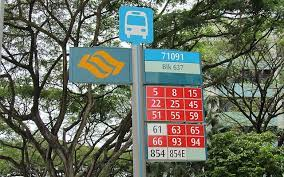

In [1]:
from gai.common.image_utils import read_to_base64
import os
from IPython.display import Image,display
encoded_string = read_to_base64("./buses.jpeg")
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "What’s in this image?"},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_string}",
                },
            },
        ],
    }
]
display(Image("./buses.jpeg"))

2024-02-20 18:04:40 DEBUG gai.lib.ITTClient:base_url=https://gaiaio.ai/api/gen
2024-02-20 18:04:40 DEBUG gai.common.http_utils:httppost:url=https://gaiaio.ai/api/gen/v1/vision/completions
2024-02-20 18:04:40 DEBUG gai.common.http_utils:httppost:data={'messages': [{'content': [{'text': 'What’s in this image?', 'type': 'text'},
                           {'image_url': {'url': ''},
                            'type': 'image_url'}],
               'role': 'user'}],
 'model': 'llava-transformers',
 'stream': True}

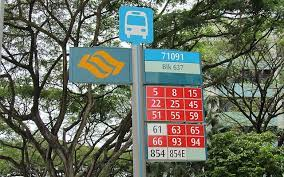

> Llava
The image features a street scene with a bus stop sign mounted on a pole. The sign displays bus numbers and routes, providing information to commuters. There are several trees in the background, adding to the urban atmosphere.

In addition to the bus stop sign, there are two other signs visible in the scene, one located near the top left corner and the other in the top right corner. These signs might provide additional information or directions for pedestrians and commuters.({'finish_reason': 'stop'}, 'finish_reason')



In [2]:
# Llava
from gai.lib.GGG import GGG
ggg=GGG("../gai-lib/gai.yml")

print("> Llava")
for chunk in ggg("itt",messages=messages,stream=True):
    print(chunk.decode(),end="",flush=True)
print("\n")


In [3]:
# OpenAI
print("> OpenAI")
for chunk in ggg(category="itt", generator="openai-vision", messages=messages, stream=True, max_tokens=100):
    print(chunk.decode(), end="", flush=True)
print("\n")

2024-02-20 18:04:53 DEBUG gai.lib.ITTClient:base_url=https://gaiaio.ai/api/gen


> OpenAI
NoneThe image shows a bus stop sign with various information elements on it. At the top of the sign, there's a blue square with a white bus icon indicating that it is a bus stop. Below this, there's a bus stop number (71091) and a reference to its location (Blk 637).

Adjacent to the bus stop number, there's a sign with the logo of possibly a transportation authority or bus operator, suggesting that the bus stop might be part of a structured transport systemNone



## Retrieval Augmented Generation (RAG)

Monitor the progress of the indexing status of the remote service by running the following:

a) /tests/client/rag/function_test_websocket_forwarder.py

b) /tests/client/rag/function_test_websocket_forwarder_listener.py

The first script will forward the status of the remote service to the local port.
The second script will pull the status from the local port and display it.

In [4]:
# Delete "demo" Collection.
from gai.lib.RAGClient import RAGClient
rag = RAGClient("../gai-lib/gai.yml")
rag.delete_collection("demo")

2024-02-20 18:05:01 DEBUG gai.lib.RAGClient:base_url=https://gaiaio.ai/api/gen/v1/rag
2024-02-20 18:05:01 INFO gai.lib.RAGClient:RAGClient.delete_collection: Deleting collection https://gaiaio.ai/api/gen/v1/rag/collection/demo


{'count': 0}

In [5]:
# List Collections
from gai.lib.RAGClient import RAGClient
rag = RAGClient("../gai-lib/gai.yml")
rag.list_collections()

2024-02-20 18:05:03 DEBUG gai.lib.RAGClient:base_url=https://gaiaio.ai/api/gen/v1/rag


{'collections': ['ba219682-c30c-4145-8497-8d05e1923a30']}

#### Start Listener

Before continuing with the following steps, start an external rag_listener to monitor the progress of the indexing status.

```bash
cd /gai-lib/tests/clients/rag
python rag_listener.py
```

It should show `Connected to wss://gaiaio.ai/api/gen/v1/rag/ws`

#### Start Indexing

In [6]:
# Index 2023 national day speech 
from gai.lib.GGG import GGG
ggg = GGG("../gai-lib/gai.yml")
def updater(status):
    print(status)

data = {
    "collection_name": "demo",
    "file_path": "../gai-lib/tests/clients/rag/pm_long_speech_2023.txt",
    "metadata": {"title": "2023 National Day Rally Speech", 
    "source": "https://www.pmo.gov.sg/Newsroom/national-day-rally-2023"},
}
ggg("index", **data)


2024-02-20 18:05:57 DEBUG gai.lib.RAGClient:base_url=https://gaiaio.ai/api/gen/v1/rag
2024-02-20 18:05:57 DEBUG gai.common.http_utils:httppost:url=https://gaiaio.ai/api/gen/v1/rag/index-file
2024-02-20 18:05:57 DEBUG gai.common.http_utils:httppost:data=None


{'document_id': '7ba94edf-6267-4a3a-a060-8dfc9f71b8f1'}

The listener output should show:

Callback: message={"progress":3}
Received status update: {"progress":3}
Callback: message={"progress":6}
Received status update: {"progress":6}
Callback: message={"progress":10}
Received status update: {"progress":10}
Callback: message={"progress":13}
Received status update: {"progress":13}
Callback: message={"progress":17}
Received status update: {"progress":17}
Callback: message={"progress":20}
Received status update: {"progress":20}
Callback: message={"progress":24}
Received status update: {"progress":24}
Callback: message={"progress":27}
Received status update: {"progress":27}
Callback: message={"progress":31}
Received status update: {"progress":31}
Callback: message={"progress":34}
Received status update: {"progress":34}
Callback: message={"progress":37}
Received status update: {"progress":37}
Callback: message={"progress":41}
Received status update: {"progress":41}
Callback: message={"progress":44}
Received status update: {"progress":44}
Callback: message={"progress":48}
Received status update: {"progress":48}
Callback: message={"progress":51}
Received status update: {"progress":51}
Callback: message={"progress":55}
Received status update: {"progress":55}
Callback: message={"progress":58}
Received status update: {"progress":58}
Callback: message={"progress":62}
Received status update: {"progress":62}
Callback: message={"progress":65}
Received status update: {"progress":65}
Callback: message={"progress":68}
Received status update: {"progress":68}
Callback: message={"progress":72}
Received status update: {"progress":72}
Callback: message={"progress":75}
Received status update: {"progress":75}
Callback: message={"progress":79}
Received status update: {"progress":79}
Callback: message={"progress":82}
Received status update: {"progress":82}
Callback: message={"progress":86}
Received status update: {"progress":86}
Callback: message={"progress":89}
Received status update: {"progress":89}
Callback: message={"progress":93}
Received status update: {"progress":93}
Callback: message={"progress":96}
Received status update: {"progress":96}
Callback: message={"progress":100}
Received status update: {"progress":100}
Callback: message=<stop>
Received status update: <stop>

In [7]:
# List documents
from gai.lib.RAGClient import RAGClient
rag = RAGClient("../gai-lib/gai.yml")
docs=rag.list_documents("demo")
print(docs)

2024-02-20 18:06:47 DEBUG gai.lib.RAGClient:base_url=https://gaiaio.ai/api/gen/v1/rag


{'documents': [{'id': '7ba94edf-6267-4a3a-a060-8dfc9f71b8f1', 'title': '2023 National Day Rally Speech', 'size': 43153, 'chunk_count': 29, 'chunk_size': 2000, 'overlap_size': 200, 'source': 'https://www.pmo.gov.sg/Newsroom/national-day-rally-2023'}]}


In [8]:
# get document
from gai.lib.RAGClient import RAGClient
rag = RAGClient("../gai-lib/gai.yml")
rag.get_document(docs['documents'][0]['id'])

2024-02-20 18:06:49 DEBUG gai.lib.RAGClient:base_url=https://gaiaio.ai/api/gen/v1/rag


{'document': {'ChunkCount': 29,
  'Authors': '',
  'ByteSize': 43153,
  'Title': '2023 National Day Rally Speech',
  'ChunkSize': 2000,
  'Publisher': None,
  'Overlap': 200,
  'PublishedDate': None,
  'SplitAlgo': None,
  'Comments': '',
  'FileName': '',
  'IsActive': True,
  'CollectionName': 'demo',
  'Source': 'https://www.pmo.gov.sg/Newsroom/national-day-rally-2023',
  'CreatedAt': '2024-02-20T10:06:07.296536',
  'Id': '7ba94edf-6267-4a3a-a060-8dfc9f71b8f1',
  'Abstract': '',
  'UpdatedAt': '2024-02-20T10:06:07.296539',
  'chunks': [{'Id': '53bfb1d80c93baf656446d5c5257e79163a771f414351902244e6d2f2e6c88c9',
    'ChunkId': '53bfb1d80c93baf656446d5c5257e79163a771f414351902244e6d2f2e6c88c9',
    'DocumentId': '7ba94edf-6267-4a3a-a060-8dfc9f71b8f1'},
   {'Id': '17ec7d5812b3efd303a797663196ab70ed36e913908f232aca68c234f13332d2',
    'ChunkId': '17ec7d5812b3efd303a797663196ab70ed36e913908f232aca68c234f13332d2',
    'DocumentId': '7ba94edf-6267-4a3a-a060-8dfc9f71b8f1'},
   {'Id': '73ffba0

In [9]:
from gai.lib.GGG import GGG
ggg = GGG(("../gai-lib/gai.yml"))

data = {
    "collection_name": "demo",
    "query_texts": "Who are the young seniors?",
}
response = ggg("retrieve", **data)
context = response.text
question = "Who are the young seniors?"
answer = ggg("ttt", messages=f"user: Based on the context below: <context>{context}</context>, answer the question: {question}\nassistant:")
for chunk in answer:
    print(chunk.decode(), end="", flush=True)

2024-02-20 18:06:54 DEBUG gai.lib.RAGClient:base_url=https://gaiaio.ai/api/gen/v1/rag
2024-02-20 18:06:54 DEBUG gai.common.http_utils:httppost:url=https://gaiaio.ai/api/gen/v1/rag/retrieve
2024-02-20 18:06:54 DEBUG gai.common.http_utils:httppost:data={'collection_name': 'demo', 'query_texts': 'Who are the young seniors?'}
2024-02-20 18:06:54 DEBUG gai.lib.ttt.TTTClient:base_url=https://gaiaio.ai/api/gen
2024-02-20 18:06:54 DEBUG gai.common.http_utils:httppost:url=https://gaiaio.ai/api/gen/v1/chat/completions
2024-02-20 18:06:54 DEBUG gai.common.http_utils:httppost:data={'beam_length': 1,
 'beams': 1,
 'max_new_tokens': 1000,
 'messages': [{'content': 'Based on the context below: '
                          '<context>{"documents":{"0":"Young Seniors are in a '
                          'unique position today. Compared to the Pioneer and '
                          'Merdeka Generations, you have benefited more from '
                          'Singapore’s growth, and generally done bette

 The context does not provide a clear definition of who the "young seniors" refer to, but it suggests that they are individuals born in 1973 or earlier and aged 50 years old or above this year.({'finish_reason': 'stop'}, 'finish_reason')

In [10]:
from gai.lib.GGG import GGG
ggg=GGG(("../gai-lib/gai.yml"))

tools = [
    {
        "type": "function",
        "function": {
            "name": "gg",
            "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
            "parameters": {
                "type": "object",
                "properties": {
                    "search_query": {
                        "type": "string",
                        "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                    }
                },
                "required": ["search_query"]
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "rag",
            "description": "The 'rag' function is a specialized tool that allows the AI to perform semantic searches on PM Lee Hsien Loong's 2023 National Day Rally. It can be invoked when the AI needs to retrieve facts or information from the speech. This function utilizes advanced Natural Language Processing (NLP) techniques to understand and match the semantic meaning of the user's query with the content of the speech. This is particularly useful when the user's query relates to specific themes, topics, or statements made during the rally.",
            "parameters": {
                "type": "object",
                "properties": {
                    "search_query": {
                        "type": "[query_1, query_2, query_3]",
                        "description": "An array of search queries to perform a semantic search in the vector database. Each string in the array represents a different way of asking the question. This expands the coverage of the search and increases the chance of finding the best match. For example, instead of using one query like 'economic policies', use multiple variations like ['PM Lee Hsien Loong's economic policies announced at the 2023 National Day Rally', 'What were the economic strategies discussed by PM Lee in 2023 National Day Rally?', 'Economic measures announced by PM Lee in 2023 Rally']."
                    }
                },
                "required": ["search_query"]
            }
        }
    }
]


# RAG + Function Call
import json
print("> Mistral-7B")
question = "What did PM Lee say about young seniors?"

messages = [{'role':'user','content':question},{'role':'assistant','content':''}]
response = ggg(category="ttt",
               messages=messages, 
               tools=tools,
               stream=False,
               max_new_tokens=100)
result=response.decode()
search_query = json.loads(result['arguments'])['search_query'][0]
data = {
    "collection_name": "demo",
    "query_texts": search_query,
}
response = ggg("retrieve", **data)
context = response.text
answer = ggg("ttt", messages=f"user: Based on the context below: <context>{context}</context>, answer the question: {question}\nassistant:")
for chunk in answer:
    print(chunk.decode(), end="", flush=True)


2024-02-20 18:07:06 DEBUG gai.lib.ttt.TTTClient:base_url=https://gaiaio.ai/api/gen
2024-02-20 18:07:06 DEBUG gai.common.http_utils:httppost:url=https://gaiaio.ai/api/gen/v1/chat/completions
2024-02-20 18:07:06 DEBUG gai.common.http_utils:httppost:data={'beam_length': 1,
 'beams': 1,
 'max_new_tokens': 100,
 'messages': [{'content': 'What did PM Lee say about young seniors?',
               'role': 'user'},
              {'content': '', 'role': 'assistant'}],
 'min_p': 0.0,
 'model': 'mistral7b-exllama',
 'stream': False,
 'temperature': 1.2,
 'token_repetition_penalty_decay': 128,
 'token_repetition_penalty_max': 1.25,
 'token_repetition_penalty_sustain': 256,
 'tools': [{'function': {'description': "The 'gg' function is a powerful tool "
                                        'that allows the AI to gather external '
                                        'information from the internet using '
                                        'Google search. It can be invoked when '
          

> Mistral-7B


2024-02-20 18:07:12 DEBUG gai.lib.RAGClient:base_url=https://gaiaio.ai/api/gen/v1/rag
2024-02-20 18:07:12 DEBUG gai.common.http_utils:httppost:url=https://gaiaio.ai/api/gen/v1/rag/retrieve
2024-02-20 18:07:12 DEBUG gai.common.http_utils:httppost:data={'collection_name': 'demo',
 'query_texts': "PM Lee Hsien Loong's speech on young seniors"}
2024-02-20 18:07:12 DEBUG gai.lib.ttt.TTTClient:base_url=https://gaiaio.ai/api/gen
2024-02-20 18:07:12 DEBUG gai.common.http_utils:httppost:url=https://gaiaio.ai/api/gen/v1/chat/completions
2024-02-20 18:07:12 DEBUG gai.common.http_utils:httppost:data={'beam_length': 1,
 'beams': 1,
 'max_new_tokens': 1000,
 'messages': [{'content': 'Based on the context below: '
                          '<context>{"documents":{"0":"SECTION 3: AGEING\\nI '
                          'want to talk about two other important issues '
                          'tonight – caring for our ageing population, and '
                          'housing our people.\\n\\nSingapor

 In his speech, PM Lee addressed the concerns of "Young Seniors", who are in their 50s and early 60s. He acknowledged that they face unique challenges such as financial pressures and caring responsibilities for both their elderly parents and adult children. To help them meet these needs, he introduced a package called the Majulah Package, which provides support based on income and CPF savings. The package aims to ensure that Young Seniors have enough retirement funds to live comfortably.({'finish_reason': 'stop'}, 'finish_reason')

In [11]:
# delete document
from gai.lib.RAGClient import RAGClient
rag = RAGClient(("../gai-lib/gai.yml"))
rag.delete_document(docs['documents'][0]['id'])

2024-02-20 18:07:21 DEBUG gai.lib.RAGClient:base_url=https://gaiaio.ai/api/gen/v1/rag


{'message': 'Document with id 7ba94edf-6267-4a3a-a060-8dfc9f71b8f1 deleted successfully'}